Chinese Word-Cloud rendering 繪製文字雲 -
- Segmentatino (thanks to [github.com/fxsjy/jieba](https://github.com/fxsjy/jieba))
- Normalized / Tokenized Walkthrough + Demo
- (optional) - Project-specfic keywords (e.g. `程子`,`知本`, `強地動觀測計畫`) fetching
- Revised cycle for unwanted jargon (e.g. `子曰`, `者也`) - *while free online UI is not good at*
- Graphic customzation

In [2]:
import jieba
import jieba.analyse
from jieba import posseg

'''
This is applying Chinese Word Segmentation (jieba)
and further checked by vis (e.g. Word Cloud)
Detailed readme & extra dictionaries - https://github.com/fxsjy/jieba
'''

'\nThis is applying Chinese Word Segmentation (jieba)\nand further checked by vis (e.g. Word Cloud)\nDetailed readme & extra dictionaries - https://github.com/fxsjy/jieba\n'

### Define Text and Dictionary (Zh Chinese)

In [8]:
# Source of Text (Chinese)
SOURCE_TEXT_TO_WORDCLOUD = 'Chinese_text.txt'

# ZH ENVIRONMENT CONSTANT

    # Download the traditional chinese dictionary from jieba-tw
    ### 繁體字較完整詞庫
    ### [ https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt ]
zh_DICT_FILEPATH = '/content/jieba/dict_jieba_tw_Dec2023.txt'
zh_DICT2_FILEPATH = '/content/jieba/dict_jeiba_tc_big.txt'
zh_STOPWORD_FILEPATH = '/content/jieba/sun-chinese-stopwords2023.txt'

# INIT traditional Chinese dictionary
jieba.set_dictionary(zh_DICT2_FILEPATH)


(Optional) Check Dictionary, or Add project-specific dictionary

In [10]:
# (Optional) Verify and Test print the Dictionary for your own research purposes
'''
# CAUTION - in Python 2, this will print all lines in file!
f = open('file', 'r')
file_contents = f.read()
print (file_contents)
f.close()

or

header_lines_to_load = 10
line_count = 0
with open('file') as input_file:
    head = [next(input_file) for _ in range(header_lines_to_load)]
    for line in input_file:
        line_count += 1
print(''.join(head))
print('... first 10 lines of this file.')
print(f"({line_count} in total.")
f.close()
'''
# =====================
# Add own project-specific dictionary
#jieba.load_userdict(file_path)
# 載入自定義詞庫 .txt
# 一個詞佔一行；每一行分三部分：單字、詞頻（可省略）、詞性（可省略），用空格隔開，順序不可顛倒。
# file_name若為路徑或二進制方式打開的文件，則文件必須為 UTF-8 編碼。
# ref for jeiba usage - https://github.com/fxsjy/jieba

# 詞頻簡潔時使用自動計算的保證分出該字的詞頻。
# e.g. -
# 氣象局 3 i
# 雲計算 5
# 凱特琳 nz
# 台中
### e.g. 氣象專業名詞
USER_defined_dict_file_path = '/content/jieba/cwb_tw_氣象專業名詞.txt'
test_word = '臺灣強地動觀測計畫'

print('[START of DEMO]...')
print('載入自定義詞庫前: ',jieba.lcut(test_word, cut_all=False))
jieba.load_userdict(USER_defined_dict_file_path)
print('...自定義詞庫 ... 載入 OK ')
print('載入自定義詞庫後, cut_all = True 全文字: ',jieba.lcut(test_word, cut_all=True))
print('載入自定義詞庫後, cut_all = False 精準 : ',jieba.lcut(test_word, cut_all=False))


[START of DEMO]...
載入自定義詞庫前:  ['臺灣強地動觀測計畫']
...自定義詞庫 ... 載入 OK 
載入自定義詞庫後, cut_all = True 全文字:  ['臺灣', '臺灣強地動觀測計畫', '地動', '觀測', '計', '畫']
載入自定義詞庫後, cut_all = False 精準 :  ['臺灣強地動觀測計畫']


### (Optional) Fine Tune keywords and cutting tolerance

In [ ]:
# =====================
# Add add-hoc words to dictionary
#jieba.add_word(word, freq=None, tag=None)
test_word = '臺灣台北地區及西半部山區附近平地也有午後雷雨'

# 加入字詞
print('\n加入字詞前: ',jieba.lcut(test_word, cut_all=False))
print('加入字詞 "西半部" - OK')
jieba.add_word('西半部', freq=None, tag=None)
print('加入字詞後: ',jieba.lcut(test_word, cut_all=False))

# =====================
# 調整搜尋結果
# see - https://github.com/fxsjy/jieba#%E8%B0%83%E6%95%B4%E8%AF%8D%E5%85%B8
# 使用add_word(word, freq=None, tag=None)並可del_word(word)在程式中修改動態搜尋結果。
# 使用suggest_freq(segment, tune=True)可調節單字頻，產生能（或不能）被分出來。
# 注意：自動計算的詞頻在使用 HMM 新詞發現功能時可能無效。

print('\n調節單字前:')
print('/'.join(jieba.cut('「台中」正確應該不會被切開', HMM=False)))
print('調節單字頻 TEST... "台中" - OK')
jieba.suggest_freq('台中', True)
##>69
print('/'.join(jieba.cut('「台中」正確應該不會被切開', HMM=False)))

# =====================
# Remove words
#jieba.del_word(word)
# 刪除字詞

print('\n刪除字詞前: ',jieba.lcut(test_word, cut_all=False))
jieba.del_word('暖熱')
jieba.del_word('做好')
print('刪除字詞後: ',jieba.lcut(test_word, cut_all=False))

print('[END of DEMO.]\n')



# 繪製文字雲 Rendering zh - WordCloud

In [12]:
# Load our text
#our_text = '氣象局及臺灣強地動觀測計畫指出，今天（15日）在西南風影響下，清晨至上午中南部沿海會有零星短暫陣雨，其他地區上半天雖然大致維持多雲到晴，不過由於環境水氣增多，天氣趨於不穩定，午後雷陣雨範圍將會擴大，除東半部地區及西半部山區外，大台北地區及西半部山區附近平地也有午後雷雨發生的機率，午後對流出現的時間會比較早，降雨有機會持續到晚上，並且局部地區也有短時強降雨發生的機率，請多留意午後天氣的變化。溫度方面，各地白天暖熱，高溫普遍約30到33度，南部近山區平地有機會出現36度以上高溫，中午前後請多補充水分及做好防曬措施，而各地夜晚及清晨低溫普遍在22至25度之間，相對舒適許多。'

with open(SOURCE_TEXT_TO_WORDCLOUD, 'r', encoding="utf-8") as f:
  our_text = f.read()
  #print(our_text)
f.close()


START RENDERING zh-cloud ......
... applying 停用詞 詞庫 LOADED - OK
1770 before removing 停用詞 with Method 1
1003 after  removing 停用詞 with Method 1
大學, 之道, 明明, 德, 親民, 止於至善, 知止, 而后, 有定, 而后, 能靜, 靜, 而后, 能安, 安, 而后, 能慮, 慮, 而后, 能得, 物有, 本末, 事有, 終始, 知所, 先後, 則近, 道, 古之欲, 明明, 德, 天下, 先治, 其國, 欲治其, 國者, 先, 齊其家, 欲, 齊其家, 先脩其身, 欲脩其, 身者, 先正, 其心, 欲, 正, 心者, 先, 誠, 其意, 欲, 誠, 其意, 先致, 其知, 致知, 格物, 物格, 而后, 知至, 知至, 而后, 意, 誠, 意, 誠, 而后, 心正, 心正, 而后, 身脩, 身脩, 而后, 家齊, 家齊, 而后, 國治, 國治, 而后, 天下, 平, 天子, 庶人, 壹, 皆, 以脩身, 其本亂, 末治者, 否, 其所厚者, 薄, 薄者, 厚, 未之有, 
, 
, 右經, 一章,  , 蓋, 孔子, 言, 曾子述, 其傳, 十章, 則曾子, 之意, 門人, 記之, 舊本, 錯, 簡, 今因, 程子, 所定, 考, 經文, 別為, 序次, 左, 
, 
, 康, 誥, 曰, 「, 克, 明德, 」, 大甲, 曰, 「, 顧, 諟, 天, 明, 命, 」, 帝典, 曰, 「, 克明, 峻德, 」, 皆, 自明, 
, 
, 右傳, 首章,  , 釋, 明明, 德, 
, 
, 湯之盤銘, 曰, 「, 苟日, 新, 日日, 新, 新, 」, 康, 誥, 曰, 「, 作, 新民, 」, 詩曰, 「, 周, 舊邦, 其命, 惟新, 」, 君子, 無所不用其極, 
, 
, 右傳, 之二, 章,  , 釋, 新民, 
, 
, 詩云, 「, 邦畿, 千里, 惟民所止, 」, 詩云, 「, 緡, 黃鳥, 止于, 丘隅, 」, 子, 曰, 「, 止, 知其, 所止, 鳥乎, 」, 詩云, 「, 穆穆, 文王, 緝熙, 敬止, 」, 人君, 止於, 仁, 人臣, 止於, 敬, 人子, 止於, 孝, 人父, 止於, 慈, 國人,

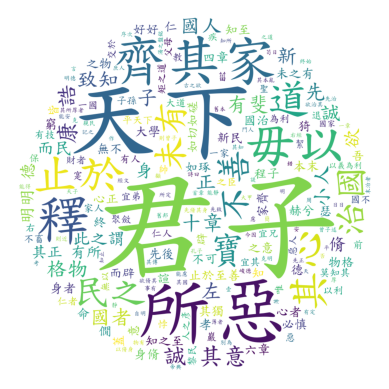

In [17]:
print("START RENDERING zh-cloud ......")
#print(our_text) # for DEMO - Chinese_text.txt
"""
                USAGE GUILDLINES -
                #Chinese stopwords (See 林宏任老師 GitHub)

                    jieba.cut() ## However, after test, does not interact with stopword list
                    jieba.analyse.set_stop_words(file_path)

                #Word segmentation

                    jieba.cut() returns a generator object
                    jieba.lcut() results a List object

                # full
                jieba.cut(TEXT, cut_all=True)
                jieba.lcut(TEXT, cut_all=True)

                # default
                jieba.cut(TEXT, cut_all=False)
                jieba.lcut(TEXT, cut_all=False)

"""

jieba.analyse.set_stop_words(zh_STOPWORD_FILEPATH)
print('... applying 停用詞 詞庫 LOADED - OK')
# print(' '.join(jieba.cut(our_text, cut_all=True, HMM=True))+'\n')
# Tested but failed = 設定停用詞詞庫後，並不會直接應用在jieba.cut(精準模式)裡。

'''
        註: 經測試過後發現，設定停用詞 (Stopword) 詞庫後，並不會直接應用在jieba.cut(精準模式)裡。
        查詢後發現，網路上亦有其他人提出相同問題。上述之解決辦法雖稱可使用 jieba 提供的 ChineseAnalyzer 處理，但經過測試後發現結果與 jieba.cut(全模式)相同。
        因此，若需要針對文章去除停留詞，可能須另寫函式處理。
        上述敘述為 Github branch dev 實測結果。若內容有誤，還請通知，謝謝。
'''
# =======
# GitHub Dev 另寫函式處理
def remove_stop_words(file_name,seg_list):
  with open(file_name,'r') as f:
    stop_words = f.readlines()

  stop_words = [stop_word.rstrip() for stop_word in stop_words]
#   stop_words += ['\n'] # rstrip會剔除掉，所以補一個回去
  new_list = []

  for seg in seg_list:
    if seg not in stop_words:
      new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
  return new_list

### Verify generator values by jieba.cut from text
#seg_list = jieba.cut(our_text, cut_all=True)
#print('generator: ',seg_list) ## This print should be failed: <generator object Tokenizar.cut at 0x7fd...
### use for loop to print
# for seg in seg_list:
#   print(seg,end=' ')
# print('')

#======== Method 1
seg_list = jieba.lcut(our_text, cut_all=False)   #jieba.lcut 回傳 list，可直接取用

seg_list_after_remove = remove_stop_words(zh_STOPWORD_FILEPATH, seg_list)

print(str(len(seg_list)) + " before removing 停用詞 with Method 1")
print(str(len(seg_list_after_remove)) + " after  removing 停用詞 with Method 1")

print(", ".join(seg_list_after_remove))

# ======= Method 2
# ALTERNATIVE SOLUTION: Remove Stopwords - more elegant python coding
"""
with open(zh_STOPWORD_FILEPATH, 'r') as f:
    stopwords = [w.strip() for w in f.readlines()]

words1 = jieba.lcut(our_text, cut_all=True)
words2 = [w for w in words1 if w not in stopwords]

print(str(len(words1)) + " before removing 停用詞 with Method 2")
print(str(len(words2)) + " after  removing 停用詞 with Method 2")
"""

# =====================
"""
# Word Segmentation - 3 outcomes by different modes.
#  HMM 新詞發現功能
#
print(' '.join(jieba.cut(our_text, cut_all=False, HMM=True))+'\n')
print(' '.join(jieba.cut(our_text, cut_all=False, HMM=False))+'\n')
print(' '.join(jieba.cut(our_text, cut_all=True, HMM=True))+'\n')
"""

"""
Another POS segmentation is using posseg

text_pos = posseg.cut(our_text)
#print(type(text_pos))
for word, tag in text_pos:
    print(word+'/'+tag)

"""

# =====================
# Keyword Extraction

# The module uses the TF-IDF score to extract keywords
# But how documents are defined in Jieba? Each list element in the input is a doc?
# 計算TF-IDF分數，並依重要性排列
# 詞頻(Term Frequency, TF)是指說計算各個分詞在文章中出現的頻率
# 逆向檔案頻率(Inverse Document Frequency, IDF)是指說計算分詞在各個文章中出現的頻率
# TF-IDF即為將TF分數與IDF分數相乘後的值進行比較，若分數越高，則該字詞重要性越大
# Jieba 有提供 IDF 的語料庫，也可以透過jieba.analyse中的set_idf_path(file_name)做更改

print(jieba.analyse.extract_tags(our_text, topK=20, withWeight=False, allowPOS=()))

# Before visualization, let's refresh our list as stable to be counted and playaround
seg_list = seg_list_after_remove

# =====================
# 統計詞頻
import pandas as pd
def count_segment_freq(seg_list):
  seg_df = pd.DataFrame(seg_list,columns=['seg'])
  seg_df['count'] = 1
  sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
  sef_freq = pd.DataFrame(sef_freq)
  return sef_freq

sef_freq = count_segment_freq(seg_list)
#print(sef_freq.head())

sef_freq.to_csv('sef_freq.csv')


# =====================
# WordCloud
# 繪製文字雲(預設背景圖片)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# INIT
FONT_PATH = '/content/fonts/KAIU.ttf'
#FONT_PATH = '/content/fonts/STHeiti-TC-Medium.ttf'
BG_IMAGEshaped_PATH = '/content/bg/circle.jpg'
BG_Colored_IMAGE_PATH = '/content/bg/flower.png'
# the path to save worldcloud
destination = '/content/'
wcDefault = 'output/default.jpg'
wcBackImage1 = 'output/WordCloud_shaped.jpg'
wcBackFontColor = 'output/WordCloud_coloring.jpg'


# Filter WordCloud Overheads / Punctuations / non-contextual words
# Specify the values you want to remove
unwanted_values = ["\n", "「", "」", " ", "曰", "而后", "此謂", "詩云", "右傳", "所謂"]

# Filter Segmentted List for WordCloud

filtered_seg_list = [seg for seg in seg_list if seg not in unwanted_values]

sef_freq = count_segment_freq(filtered_seg_list)
sef_freq.to_csv('sef_freq_FILTERED.csv')

seg_list=' '.join(seg_list)
filtered_seg_list=' '.join(filtered_seg_list)

import matplotlib.pyplot as plt

import os
from os import path

# Default WordCloud display (retangular)
wc_default = WordCloud(background_color='black',font_path=FONT_PATH)
wc_default.generate(filtered_seg_list)
wc_default.to_file(path.join(destination, wcDefault))

#plt.imshow(wc_default)
#plt.axis("off")
#plt.show()

# 繪製文字雲(手動背景圖片)
#import imageio as iio  # old version v2, usage imageio.v2.imread()
import imageio.v3 as iio
backshaped_color = iio.imread(BG_IMAGEshaped_PATH)

#WordCloud Parameters
"""
wc = WordCloud(background_color="white",    #   背景顏色
               max_words=500,              #   最大詞數
               mask=back_color,             #   掩膜，產生文字雲背景的區域，以該參數值作圖繪制文字雲，這個參數不為空時，width,height會被忽略
               max_font_size=80,           #   顯示字體的最大值
               stopwords=STOPWORDS.add("差評"),   #   使用內置的屏蔽詞，再添加一個
               font_path=font,              #   解決顯示口字型亂碼問題，可進入C:/Windows/Fonts/目錄更換字體
               random_state=42,             #   為每一詞返回一個PIL顏色
               prefer_horizontal=10)        #   調整文字雲中字體水平和垂直的多少
"""

wc = WordCloud(
    background_color='white',
    mask=backshaped_color,
    random_state=10,
    font_path=FONT_PATH
                )
wc.generate(filtered_seg_list)
plt.imshow(wc)
plt.axis('off')
plt.show()



In [18]:
wc.to_file(path.join(destination, wcBackImage1))

# 繪製文字雲(手動背景圖片-用圖片色彩為文字色彩)
back_font_color = iio.imread(BG_Colored_IMAGE_PATH)
wc_colored = WordCloud(
    background_color='white',
    mask=back_font_color,
    random_state=10,
    font_path=FONT_PATH
                )
wc_colored.generate(filtered_seg_list)
image_colors = ImageColorGenerator(back_font_color)

wc_colored.recolor(color_func=image_colors)

# plt.imshow(wc_colored.recolor(color_func=image_colors))
# plt.axis('off')
# plt.show()

wc_colored.to_file(path.join(destination, wcBackFontColor))

# files generated - see \output\    # by default